In [5]:
pacman::p_load(tidyverse, haven, dplyr, foreign,glue, devtools, expss)

In [6]:
install.packages("haven")

Warning message:
"package 'haven' is in use and will not be installed"


In [7]:
install.packages("dplyr")

Warning message:
"package 'dplyr' is in use and will not be installed"


In [8]:
col1 <- c('CASEID', 'V000', 'V001', 'V002', 'V003', 'V004', 'V008', 'V009', 'V010', 'V011', 'V012', 'V024', 'V102', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V127', 'V133')
col2 <- c('CASEID', 'V201', 'V218', 'V301', 'V302', 'V323', 'V323A', 'V325A', 'V326', 'V327', 'V337', 'V359', 'V360', 'V361', 'V362', 'V363', 'V364', 'V367', 'V372', 'V372A', 'V375A', 'V376', 'V376A', 'V379', 'V380') 
col3 <- c('CASEID', 'V501', 'V502', 'V503', 'V504', 'V505', 'V506', 'V507', 'V508', 'V509', 'V510', 'V511', 'V512', 'V513', 'V525', 'V613', 'V714', 'V715')
is.character(data$CASEID)


ERROR: Error in data$CASEID: objeto de tipo 'closure' no es subconjunto


In [14]:

#REC0111
Lista= list()
for (j in 2015:2020){
  if(j < 2019){
    data<-read_sav(paste0("REC0111-",j,".SAV"))
    }
  data<-read_sav(paste0("REC0111-",j,".sav"))
  k=j-2014
  #Columnas seleccionadas
  data=data[, (colnames(data) %in% col1)]
  data$anio=j
  Lista[[k]]=data
    }
REC0111 = do.call(rbind,Lista) # Append
rm(data, Lista)

#RE516171
Lista= list()
for (j in 2015:2020){
  if(j < 2019){
    data<-read_sav(paste0("RE516171-",j,".SAV"))
  }
  data<-read_sav(paste0("RE516171-",j,".sav"))
  k=j-2014
  #Columnas seleccionadas
  data=data[, (colnames(data) %in% col3)]
  Lista[[k]]=data
}
RE516171 = do.call(rbind,Lista) # Append
rm(data, Lista)

#REC223132
Lista= list()
for (j in 2015:2020){
  if(j < 2019){
    data<-read_sav(paste0("REC223132-",j,".SAV"))
  }
  data<-read_sav(paste0("REC223132-",j,".sav"))
  k=j-2014
  #Columnas seleccionadas
  data=data[, (colnames(data) %in% col2)]
  Lista[[k]]=data
}
REC223132 = do.call(rbind,Lista) # Append
rm(data, Lista)

#Emparejamos
endes<-left_join(REC0111,RE516171, by=c("CASEID"))%>%
  left_join(REC223132, by=c("CASEID"))

nombres<-colnames(endes)

# Nombre de las variables
for(x in nombres){
  data<-endes[, (x %in% nombres)]
  print(Hmisc::label(data))
}

Hmisc::label(endes$V127)

# Imprimir los labels de todas las variables con etiquetas
for(x in nombres){
  data<-endes[, (x %in% nombres)]
  if(is.labelled(data)==T){
    print_labels(data)
    }
  }



ERROR: Error: 'REC0111-2015.SAV' does not exist in current working directory ('C:/Users/user/Documents/GitHub/1ECO35_R_PYTHON/Trabajo_grupal/WH5').


Parte 2

In [2]:
library(tidyr)  
library(dplyr)
library(foreign)
library(haven)



In [3]:
library(haven)
data <- read_dta("~/GitHub/1ECO35_R_PYTHON/data/Juntos_program/data.dta")
View(data)

numper,numpanh15,numpanh16,numpanh17,numpanh18,numpanh19,mes_15,ubigeo_15,dominio_15,p400a3_15,⋯,mes_18,ubigeo_18,dominio_18,p400a3_18,p4022_18,mes_19,ubigeo_19,dominio_19,p400a3_19,p4022_19
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
15368,1158,1158,1158,1158,1158,11,10101,sierra norte,1946,⋯,12,10101,sierra norte,1946,0,11,10101,sierra norte,1946,0
15369,1158,1158,1158,1158,1158,11,10101,sierra norte,1973,⋯,12,10101,sierra norte,1973,0,11,10101,sierra norte,1973,0
15380,1162,1162,1162,1162,1162,11,10101,sierra norte,1987,⋯,12,10101,sierra norte,1987,0,11,10101,sierra norte,1987,1
15381,1162,1162,1162,1162,1162,11,10101,sierra norte,2009,⋯,12,10101,sierra norte,2009,0,11,10101,sierra norte,2009,0
15410,1185,1185,1185,1185,1185,7,10101,sierra norte,1955,⋯,7,10101,sierra norte,1955,0,7,10101,sierra norte,1955,1
15412,1186,1186,1186,1186,1186,7,10101,sierra norte,1966,⋯,7,10101,sierra norte,1966,0,7,10101,sierra norte,1966,0
15415,1188,1188,1188,1188,1188,7,10101,sierra norte,1973,⋯,7,10101,sierra norte,1973,1,7,10101,sierra norte,1973,0
15440,1220,1220,1220,1220,1220,8,10401,selva,2000,⋯,4,10401,selva,2000,1,2,10401,selva,2000,0
15442,1220,1220,1220,1220,1220,8,10401,selva,2007,⋯,4,10401,selva,2007,0,2,10401,selva,2007,0


In [4]:
library(haven)
unidos <- read_dta("~/GitHub/1ECO35_R_PYTHON/data/Juntos_program/unidos.dta")
View(unidos)

ubigeo,distrito,provincia,region,unidos
<dbl>,<chr>,<chr>,<chr>,<dbl>
10101,Chachapoyas,Chachapoyas,Amazonas,1
10102,Asuncion,Chachapoyas,Amazonas,1
10103,Balsas,Chachapoyas,Amazonas,0
10104,Cheto,Chachapoyas,Amazonas,1
10105,Chiliquin,Chachapoyas,Amazonas,0
10106,Chuquibamba,Chachapoyas,Amazonas,1
10107,Granada,Chachapoyas,Amazonas,0
10108,Huancas,Chachapoyas,Amazonas,1
10109,La Jalca,Chachapoyas,Amazonas,0


In [5]:
#exploramos la base de datos
glimpse(data)
glimpse(unidos)
levels(data)


Rows: 5,546
Columns: 31
$ numper     <dbl> 15368, 15369, 15380, 15381, 15410, 15412, 15415, 15440, 154…
$ numpanh15  <dbl> 1158, 1158, 1162, 1162, 1185, 1186, 1188, 1220, 1220, 1220,…
$ numpanh16  <dbl> 1158, 1158, 1162, 1162, 1185, 1186, 1188, 1220, 1220, 1220,…
$ numpanh17  <dbl> 1158, 1158, 1162, 1162, 1185, 1186, 1188, 1220, 1220, 1220,…
$ numpanh18  <dbl> 1158, 1158, 1162, 1162, 1185, 1186, 1188, 1220, 1220, 1220,…
$ numpanh19  <dbl> 1158, 1158, 1162, 1162, 1185, 1186, 1188, 1220, 1220, 1220,…
$ mes_15     <dbl> 11, 11, 11, 11, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1…
$ ubigeo_15  <dbl> 10101, 10101, 10101, 10101, 10101, 10101, 10101, 10401, 104…
$ dominio_15 <chr> "sierra norte", "sierra norte", "sierra norte", "sierra nor…
$ p400a3_15  <dbl> 1946, 1973, 1987, 2009, 1955, 1966, 1973, 2000, 2007, 1966,…
$ p4022_15   <dbl> 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,…
$ mes_16     <dbl> 11, 11, 11, 11, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1…
$ ubigeo_16  <db

NULL

In [8]:
install.packages('mice')

Installing package into 'C:/Users/user/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependency 'Rcpp'




package 'Rcpp' successfully unpacked and MD5 sums checked
package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\Rtmp8ukZzK\downloaded_packages



Attaching package: 'mice'


The following object is masked from 'package:stats':

    filter


The following objects are masked from 'package:base':

    cbind, rbind




 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,ubigeo,distrito,provincia,region,unidos,
1874,1,1,1,1,1,0
,0,0,0,0,0,0


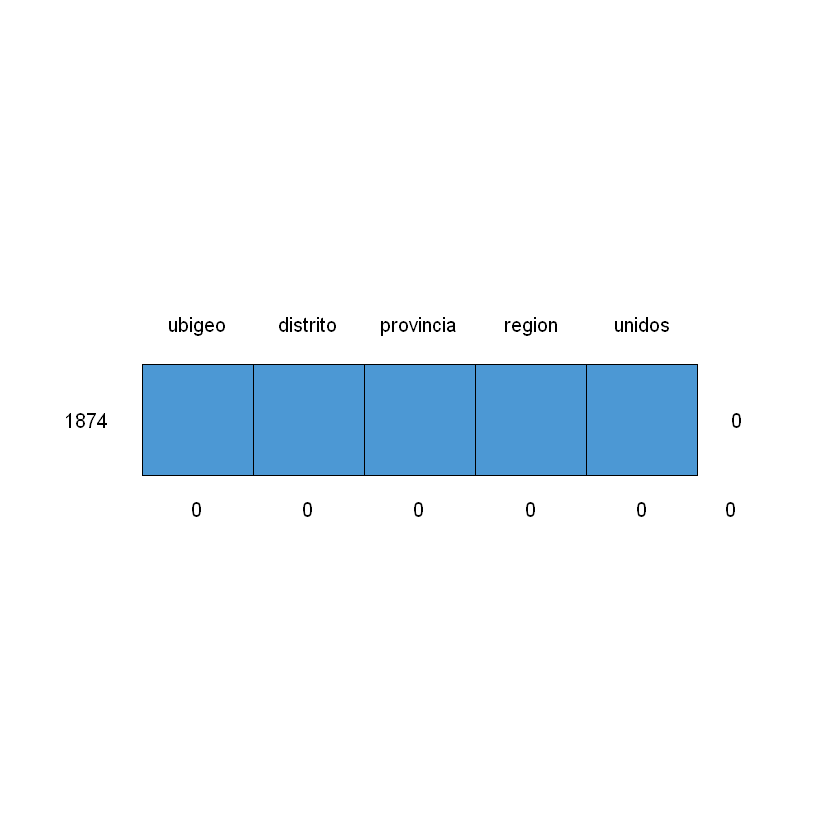

,numper,numpanh15,numpanh16,numpanh17,numpanh18,numpanh19,mes_15,ubigeo_15,dominio_15,mes_16,⋯,p4022_15,p400a3_16,p4022_16,p400a3_17,p4022_17,p400a3_18,p4022_18,p400a3_19,p4022_19,
5541,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,0,0,2
1,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,0,0,1,1,2
1,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,0,1,1,1,1,2
1,1,1,1,1,1,1,1,1,1,1,⋯,1,0,0,1,1,1,1,1,1,2
1,1,1,1,1,1,1,1,1,1,1,⋯,0,1,1,1,1,1,1,1,1,2
,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,10


numper  numpanh15  numpanh16  numpanh17  numpanh18  numpanh19     mes_15 
         0          0          0          0          0          0          0 
 ubigeo_15 dominio_15  p400a3_15   p4022_15     mes_16  ubigeo_16 dominio_16 
         0          0          1          1          0          0          0 
 p400a3_16   p4022_16     mes_17  ubigeo_17 dominio_17  p400a3_17   p4022_17 
         1          1          0          0          0          1          1 
    mes_18  ubigeo_18 dominio_18  p400a3_18   p4022_18     mes_19  ubigeo_19 
         0          0          0          1          1          0          0 
dominio_19  p400a3_19   p4022_19 
         0          1          1

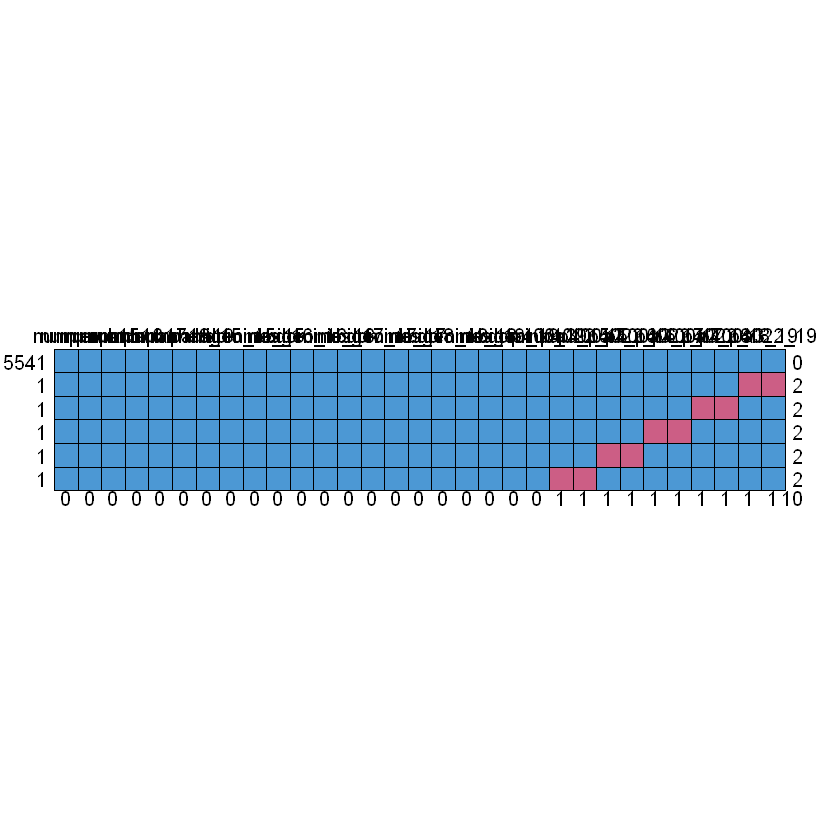

In [9]:
library(mice)
md.pattern(unidos)  # No need for mice. This data set is completely observed.
md.pattern(data) #Sí hay missing values
colSums (is.na(data))
data.clean<-na.omit(data)

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,ubigeo,distrito,provincia,region,unidos,
1874,1,1,1,1,1,0
,0,0,0,0,0,0


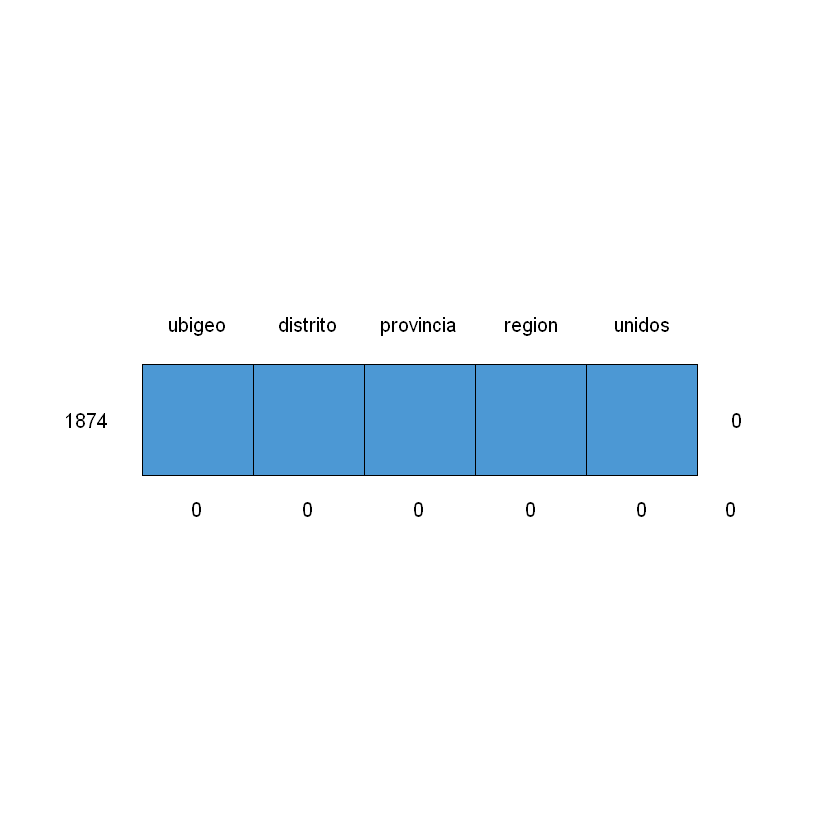

,numper,numpanh15,numpanh16,numpanh17,numpanh18,numpanh19,mes_15,ubigeo_15,dominio_15,mes_16,⋯,p4022_15,p400a3_16,p4022_16,p400a3_17,p4022_17,p400a3_18,p4022_18,p400a3_19,p4022_19,
5541,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,0,0,2
1,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,0,0,1,1,2
1,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,0,1,1,1,1,2
1,1,1,1,1,1,1,1,1,1,1,⋯,1,0,0,1,1,1,1,1,1,2
1,1,1,1,1,1,1,1,1,1,1,⋯,0,1,1,1,1,1,1,1,1,2
,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,10


numper  numpanh15  numpanh16  numpanh17  numpanh18  numpanh19     mes_15 
         0          0          0          0          0          0          0 
 ubigeo_15 dominio_15  p400a3_15   p4022_15     mes_16  ubigeo_16 dominio_16 
         0          0          1          1          0          0          0 
 p400a3_16   p4022_16     mes_17  ubigeo_17 dominio_17  p400a3_17   p4022_17 
         1          1          0          0          0          1          1 
    mes_18  ubigeo_18 dominio_18  p400a3_18   p4022_18     mes_19  ubigeo_19 
         0          0          0          1          1          0          0 
dominio_19  p400a3_19   p4022_19 
         0          1          1

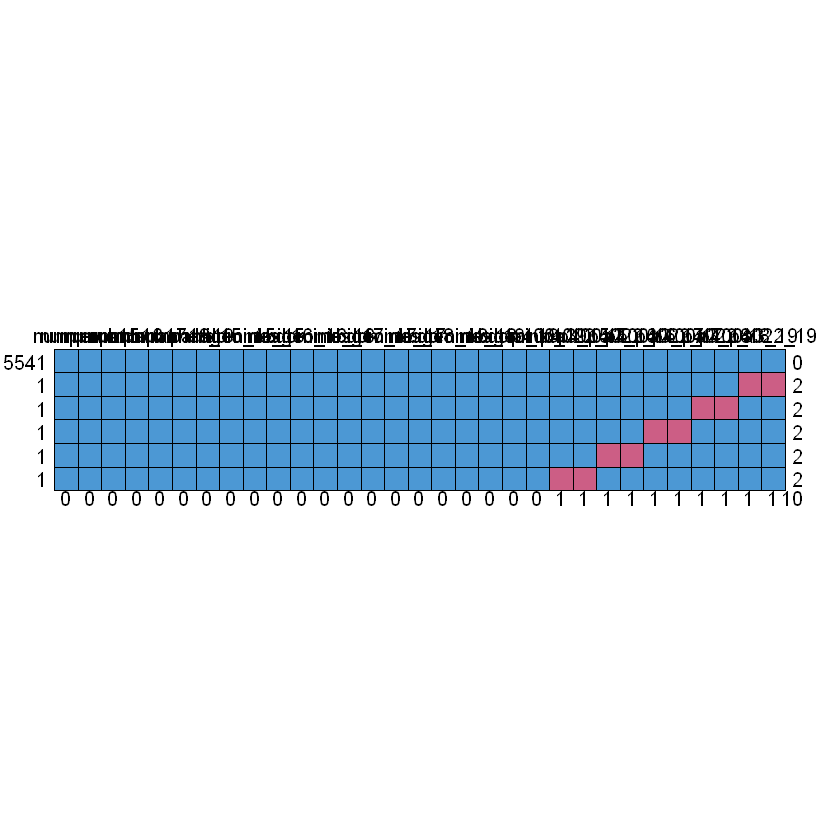

In [10]:
md.pattern(unidos)  # No need for mice. This data set is completely observed.
md.pattern(data) #Sí hay missing values
colSums (is.na(data))
data.clean<-na.omit(data)


In [12]:
#PARTE 3 - DATAPANEL

data <- read_dta("~/GitHub/1ECO35_R_PYTHON/data/Juntos_program/data.dta")
View(data)


numper,numpanh15,numpanh16,numpanh17,numpanh18,numpanh19,mes_15,ubigeo_15,dominio_15,p400a3_15,⋯,mes_18,ubigeo_18,dominio_18,p400a3_18,p4022_18,mes_19,ubigeo_19,dominio_19,p400a3_19,p4022_19
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
15368,1158,1158,1158,1158,1158,11,10101,sierra norte,1946,⋯,12,10101,sierra norte,1946,0,11,10101,sierra norte,1946,0
15369,1158,1158,1158,1158,1158,11,10101,sierra norte,1973,⋯,12,10101,sierra norte,1973,0,11,10101,sierra norte,1973,0
15380,1162,1162,1162,1162,1162,11,10101,sierra norte,1987,⋯,12,10101,sierra norte,1987,0,11,10101,sierra norte,1987,1
15381,1162,1162,1162,1162,1162,11,10101,sierra norte,2009,⋯,12,10101,sierra norte,2009,0,11,10101,sierra norte,2009,0
15410,1185,1185,1185,1185,1185,7,10101,sierra norte,1955,⋯,7,10101,sierra norte,1955,0,7,10101,sierra norte,1955,1
15412,1186,1186,1186,1186,1186,7,10101,sierra norte,1966,⋯,7,10101,sierra norte,1966,0,7,10101,sierra norte,1966,0
15415,1188,1188,1188,1188,1188,7,10101,sierra norte,1973,⋯,7,10101,sierra norte,1973,1,7,10101,sierra norte,1973,0
15440,1220,1220,1220,1220,1220,8,10401,selva,2000,⋯,4,10401,selva,2000,1,2,10401,selva,2000,0
15442,1220,1220,1220,1220,1220,8,10401,selva,2007,⋯,4,10401,selva,2007,0,2,10401,selva,2007,0


In [13]:
library(haven)
unidos <- read_dta("~/GitHub/1ECO35_R_PYTHON/data/Juntos_program/unidos.dta")
View(unidos)


ubigeo,distrito,provincia,region,unidos
<dbl>,<chr>,<chr>,<chr>,<dbl>
10101,Chachapoyas,Chachapoyas,Amazonas,1
10102,Asuncion,Chachapoyas,Amazonas,1
10103,Balsas,Chachapoyas,Amazonas,0
10104,Cheto,Chachapoyas,Amazonas,1
10105,Chiliquin,Chachapoyas,Amazonas,0
10106,Chuquibamba,Chachapoyas,Amazonas,1
10107,Granada,Chachapoyas,Amazonas,0
10108,Huancas,Chachapoyas,Amazonas,1
10109,La Jalca,Chachapoyas,Amazonas,0


In [14]:
#viendo columnas de ubigeo
 
colnames(data)
 
data$ubigeo_15==data$ubigeo_16
unique(data$ubigeo_15==data$ubigeo_16)
unique(data$ubigeo_15==data$ubigeo_17)
unique(data$ubigeo_15==data$ubigeo_18)
unique(data$ubigeo_15==data$ubigeo_19)


[1] "numper"     "numpanh15"  "numpanh16"  "numpanh17"  "numpanh18" 
 [6] "numpanh19"  "mes_15"     "ubigeo_15"  "dominio_15" "p400a3_15" 
[11] "p4022_15"   "mes_16"     "ubigeo_16"  "dominio_16" "p400a3_16" 
[16] "p4022_16"   "mes_17"     "ubigeo_17"  "dominio_17" "p400a3_17" 
[21] "p4022_17"   "mes_18"     "ubigeo_18"  "dominio_18" "p400a3_18" 
[26] "p4022_18"   "mes_19"     "ubigeo_19"  "dominio_19" "p400a3_19" 
[31] "p4022_19"

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [15] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [29] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [43] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [57] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [71] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [85] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [99] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [113] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [127] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [141] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [155] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [169] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [183] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [197] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [225] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [239] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [253] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [267] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [281] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [295] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [309] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [323] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [337] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [351] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [365] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [379] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [393] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [407] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [421] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [435] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [449] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [463] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [477] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [491] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [505] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [519] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [533] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [547] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [561] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [575] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [589] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [603] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [617] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [631] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [645] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [659] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [673] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [687] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [701] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [715] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [15]:
#Seleccionado filas con información en el programa Juntos
unidos[which(unidos$unidos==1),]->unidos2


In [16]:
#Viendo tamaño de matrices
dim(unidos)
dim(unidos2)


[1] 1874    5

[1] 958   5

In [18]:
#Cruzando tablas
 
View(merge(data,unidos2,by.x="ubigeo_15",by.y="ubigeo"))
 
merge(data,unidos2,by.x="ubigeo_15",by.y="ubigeo")->data_panel
 
library("expss")
 
colnames(data_panel)
 
data_panel<-apply_labels(data_panel,numper="Unique individual identifier",
                     	numpanh15="Unique household identifier in 2015",
                     	numpanh16="Unique household identifier in 2016",
                     	numpanh17="Unique household identifier in 2017",
                     	numpanh18="Unique household identifier in 2018",
                     	numpanh19="Unique household identifier in 2019",
                     	mes_15="Month of the survey in 2015",
	                     mes_16="Month of the survey in 2016",
                     	mes_17="Month of the survey in 2017",
                     	mes_18="Month of the survey in 2018",
                     	mes_19="Month of the survey in 2019",
    	                 p400a3_15="Year of birth of the person, reported in 2015",
                     	p400a3_16="Year of birth of the person, reported in 2016",
                     	p400a3_17="Year of birth of the person, reported in 2017",
        	             p400a3_18="Year of birth of the person, reported in 2018",
                     	p400a3_19="Year of birth of the person, reported in 2019",
                     	p4022_15="Were you sick in the last 4 weeks (in 2015)?",
              	       p4022_16="Were you sick in the last 4 weeks (in 2016)?",
                     	p4022_17="Were you sick in the last 4 weeks (in 2017)?",
                     	p4022_18="Were you sick in the last 4 weeks (in 2018)?",
                     	p4022_19="Were you sick in the last 4 weeks (in 2019)?",
                         p4022_15=c("Yes"=1,"No"=0),
                         p4022_16=c("Yes"=1,"No"=0),
                         p4022_17=c("Yes"=1,"No"=0),
                         p4022_18=c("Yes"=1,"No"=0),
                         p4022_19=c("Yes"=1,"No"=0),
                     	unidos=c("Yes"=1,"No"=0))
 
unidos<-apply_labels(unidos=c("Yes"=1,"No"=0))
 
View(data_panel)
 


ubigeo_15,numper,numpanh15,numpanh16,numpanh17,numpanh18,numpanh19,mes_15,dominio_15,p400a3_15,⋯,p4022_18,mes_19,ubigeo_19,dominio_19,p400a3_19,p4022_19,distrito,provincia,region,unidos
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
10101,15415,1188,1188,1188,1188,1188,7,sierra norte,1973,⋯,1,7,10101,sierra norte,1973,0,Chachapoyas,Chachapoyas,Amazonas,1
10101,15410,1185,1185,1185,1185,1185,7,sierra norte,1955,⋯,0,7,10101,sierra norte,1955,1,Chachapoyas,Chachapoyas,Amazonas,1
10101,15412,1186,1186,1186,1186,1186,7,sierra norte,1966,⋯,0,7,10101,sierra norte,1966,0,Chachapoyas,Chachapoyas,Amazonas,1
10101,15380,1162,1162,1162,1162,1162,11,sierra norte,1987,⋯,0,11,10101,sierra norte,1987,1,Chachapoyas,Chachapoyas,Amazonas,1
10101,15369,1158,1158,1158,1158,1158,11,sierra norte,1973,⋯,0,11,10101,sierra norte,1973,0,Chachapoyas,Chachapoyas,Amazonas,1
10101,15368,1158,1158,1158,1158,1158,11,sierra norte,1946,⋯,0,11,10101,sierra norte,1946,0,Chachapoyas,Chachapoyas,Amazonas,1
10101,15381,1162,1162,1162,1162,1162,11,sierra norte,2009,⋯,0,11,10101,sierra norte,2009,0,Chachapoyas,Chachapoyas,Amazonas,1
10307,15895,1558,1558,1558,1558,1558,8,selva,1997,⋯,0,10,10307,selva,1997,1,Jazan,Bongara,Amazonas,1
10307,15886,1556,1556,1556,1556,1556,8,selva,2014,⋯,0,10,10307,selva,2014,0,Jazan,Bongara,Amazonas,1


[1] "ubigeo_15"  "numper"     "numpanh15"  "numpanh16"  "numpanh17" 
 [6] "numpanh18"  "numpanh19"  "mes_15"     "dominio_15" "p400a3_15" 
[11] "p4022_15"   "mes_16"     "ubigeo_16"  "dominio_16" "p400a3_16" 
[16] "p4022_16"   "mes_17"     "ubigeo_17"  "dominio_17" "p400a3_17" 
[21] "p4022_17"   "mes_18"     "ubigeo_18"  "dominio_18" "p400a3_18" 
[26] "p4022_18"   "mes_19"     "ubigeo_19"  "dominio_19" "p400a3_19" 
[31] "p4022_19"   "distrito"   "provincia"  "region"     "unidos"

ERROR: Error in UseMethod("apply_labels"): no applicable method for 'apply_labels' applied to an object of class "c('double', 'numeric')"


[1] "labelled" "numeric"

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"


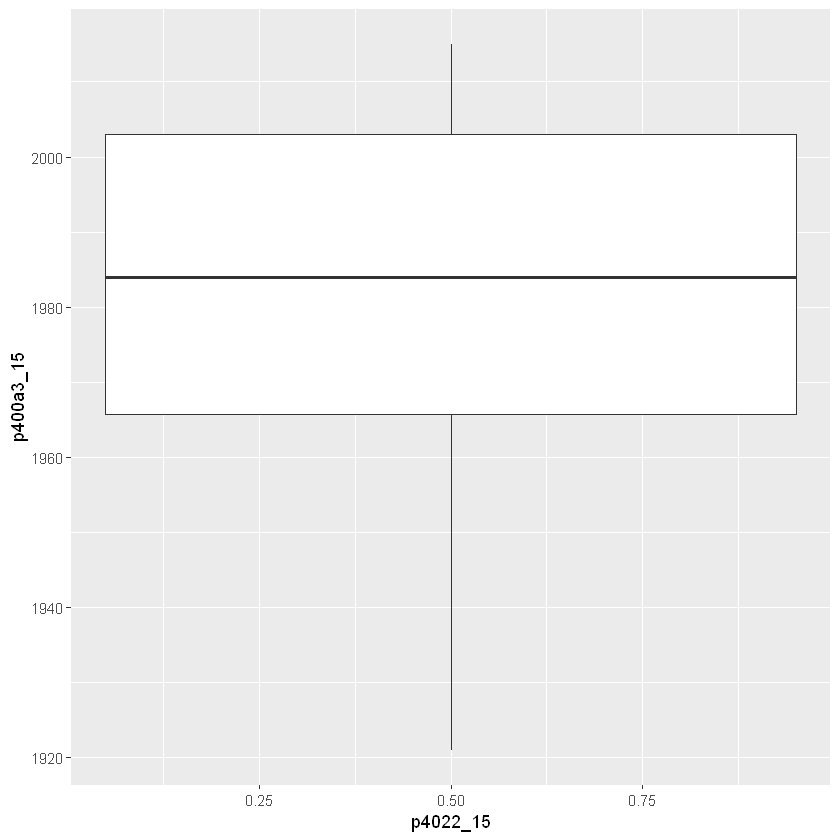

        p400a3_15
p4022_15 1921 1925 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938
     No     1    3    1    3    0    4    6    3    2    4    6    7    8    7
     Yes    0    0    1    0    2    2    0    0    3    3    3    3    1    3
        p400a3_15
p4022_15 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952
     No     6   12    3    6   12    4   11   13   11   12   21   16   12   23
     Yes    1    2    4    5    6    6    5    5    7    7    6   12    3    6
        p400a3_15
p4022_15 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
     No    23   24   16   16   19   23   24   33   18   19   28   22   25   39
     Yes   12    5    5    5    7   10    4   11    9    3   10   12    9    6
        p400a3_15
p4022_15 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
     No    29   33   32   27   19   26   31   38   29   32   37   26   30   30
     Yes   12   11   13   14   11   15   11    7    8    4 

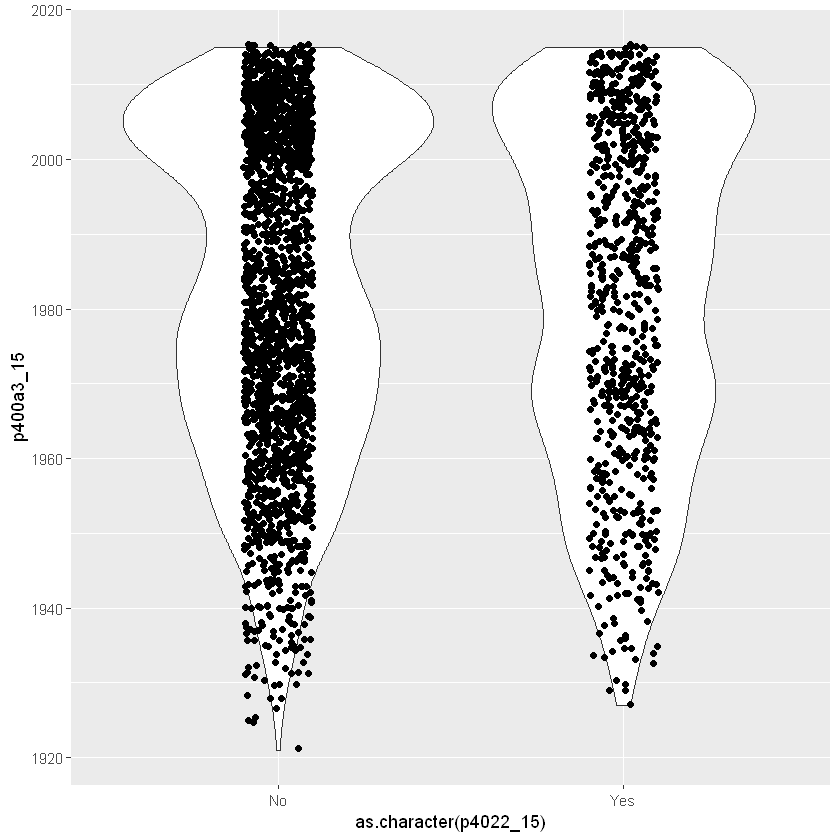

In [19]:
library(ggplot2)
 
class(data_panel$p4022_15)
 
ggplot(data_panel,aes(p4022_15,p400a3_15))+geom_boxplot()
 
 
ggplot(data_panel,aes(as.character(p4022_15),p400a3_15))+geom_violin()+geom_jitter(width=0.1)
 
with(data_panel,table(p4022_15,p400a3_15))
 


In [20]:
###Calculo de porcentajes
 
names(table(unidos$region))->regiones
 
library(dplyr)
 
datos<-unidos%>%group_by(region)%>%count(unidos)
head(datos)
 
unique(datos$region)
(datos[which(datos$unidos==1),3]/(datos[which(datos$unidos==0),3]+datos[which(datos$unidos==1),3]))->porcentaje
 
data.frame(region=unique(datos$region),porcentaje=porcentaje)->resultado
 
View(resultado)
View(datos)


region,unidos,n
<chr>,<dbl>,<int>
Amazonas,0,42
Amazonas,1,42
Ancash,0,77
Ancash,1,89
Apurimac,0,33
Apurimac,1,51


[1] "Amazonas"      "Ancash"        "Apurimac"      "Arequipa"     
 [5] "Ayacucho"      "Cajamarca"     "Callao"        "Cusco"        
 [9] "Huancavelica"  "Huanuco"       "Ica"           "Junin"        
[13] "La Libertad"   "Lambayeque"    "Lima"          "Loreto"       
[17] "Madre de Dios" "Moquegua"      "Pasco"         "Piura"        
[21] "Puno"          "San Martin"    "Tacna"         "Tumbes"       
[25] "Ucayali"

region,n
<chr>,<dbl>
Amazonas,0.5000000
Ancash,0.5361446
Apurimac,0.6071429
Arequipa,0.4954128
Ayacucho,0.5378151
Cajamarca,0.4960630
Callao,0.7142857
Cusco,0.4732143
Huancavelica,0.5500000


region,unidos,n
<chr>,<dbl>,<int>
Amazonas,0,42
Amazonas,1,42
Ancash,0,77
Ancash,1,89
Apurimac,0,33
Apurimac,1,51
Arequipa,0,55
Arequipa,1,54
Ayacucho,0,55
